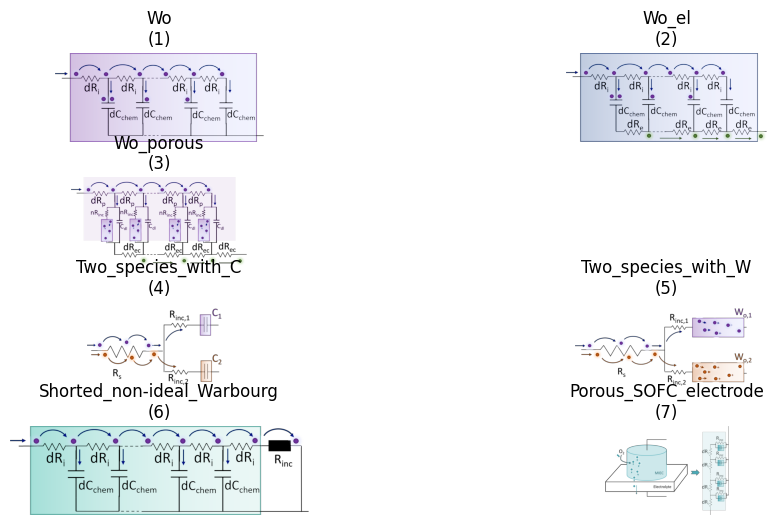

In [1]:
# Step 1: Show images as the options
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# List of images, titles and positions
imagenes = [
    ('/work/Wo.png', 'Wo', (0, 0)),
    ('/work/Wo_el.png', 'Wo_el', (0, 1)),
    ('/work/Wo_porous.png', 'Wo_porous', (1, 0)),
    ('/work/Two_speciesC.png', 'Two_species_with_C', (2, 0)),
    ('/work/Two_speciesW.png', 'Two_species_with_W', (2, 1)),
    ('/work/Ws.png', 'Shorted_non-ideal_Warbourg', (3, 0)),
    ('/work/SOFC.png', 'Porous_SOFC_electrode', (3, 1))
]

# Creating the grid
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(4, 2, hspace=0.4)       # 2 rows, 2 columns and interspace

# Loop to show options
for i, (path, title, pos) in enumerate(imagenes):
    ax = plt.subplot(gs[pos[0], pos[1]])
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{title}\n({i+1})")
plt.show()




# Step 2: Option selection
opcion = int(input("👉 Write the option number you prefer (1-7): "))
gIIS_type = 'total'
EIS_plot = input("👉 What do you want to plot: EIS or gIIS? (EIS/gIIS): ").strip().lower()

if EIS_plot in ['eis', 'eis plot']:
    gIIS_type = 'eis'

elif EIS_plot in ['giis', 'giis plot']:
    if opcion in [1, 2, 3, 6, 7]:
        gIIS_type = input("👉 Write the type of gIIS depending on the volume observed with your technique (total, partial, or local): ").strip().lower()
        # Basic check of the selected option
        if gIIS_type not in ['total', 'local', 'partial']:
            print("IMPORTANT⚠️: Not recognized input for gIIS type. 'Total' will be used by defect.")
            gIIS_type = 'total'
    else:
        print("Total two-species gIIS selected.") 

/root/work/Definitions.py:803: RuntimeWarning: overflow encountered in exp
  sinh= (np.exp(x)-np.exp(-1*x)) / 2
/root/work/Definitions.py:803: RuntimeWarning: invalid value encountered in divide
  sinh= (np.exp(x)-np.exp(-1*x)) / 2
/root/work/Definitions.py:804: RuntimeWarning: overflow encountered in exp
  cosh= (np.exp(x)+np.exp(-1*x)) / 2
/root/work/Definitions.py:804: RuntimeWarning: invalid value encountered in divide
  cosh= (np.exp(x)+np.exp(-1*x)) / 2
/root/work/Definitions.py:805: RuntimeWarning: invalid value encountered in divide
  tanh= sinh/cosh
/root/work/Definitions.py:806: RuntimeWarning: invalid value encountered in divide
  Warb= ((Ri**2+Re**2+1/Rinc*(Re*Ri**2+Ri*Re**2))*cosh+2*Re*Ri+(Re*Ri*x+Ri/Rinc*(Ri**2+Re*Ri)/x)*sinh) / (x*(Re+Ri)*sinh + (cosh*(Re+Ri)**2) / Rinc)


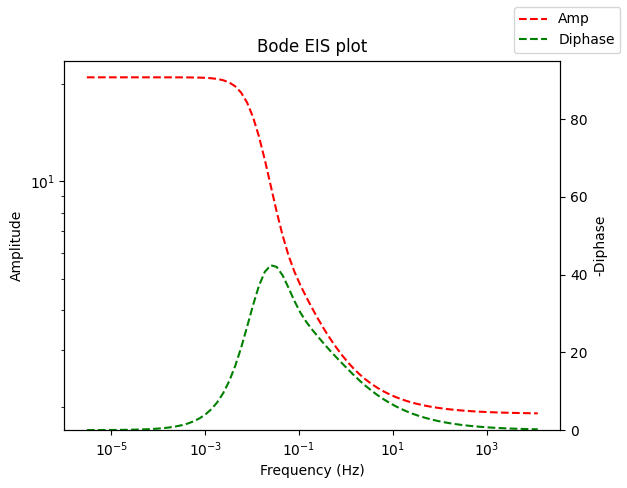

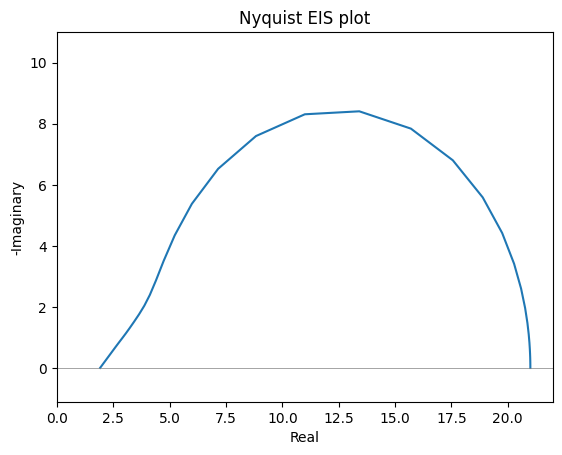

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
pi = math.pi

w_values = np.logspace(np.log10(0.000003), np.log10(10000000), 100)*2*np.pi

from Definitions import Wo, Wo_el, Wo_pore, Ws, SOFC, Two_C, Two_W

# Step 3: Execute the código of the chosen option

###########################This is Option 1############################
if opcion == 1:
    R  = float(input("Input the series resistance (R_s): "))
    Ri = float(input("Input the ionic resistance (R_i): "))
    C  = float(input("Input the chemical capacitance (C_chem): "))

    Wo(w_values, R, Ri, C, gIIS_type)
    

###########################This is Option 2############################
elif opcion == 2:
    R  = float(input("Input the series resistance (R_s): "))
    Ri = float(input("Input the ionic resistance (R_i): "))
    Re = float(input("Input the electrical resistance (R_e): "))
    C  = float(input("Input the chemical capacitance (C_chem): "))
    
    Wo_el(w_values, R, Ri, Re, C, gIIS_type)


###########################This is Option 3############################
elif opcion == 3:
    R  = float(input("Input the series resistance (R_s): "))
    Ri = float(input("Input the ionic resistance in the pores (R_pore): "))
    Re = float(input("Input the electrical resistance (R_e): "))
    C  = float(input("Input the chemical capacitance (C_chem): "))
    RiW = float(input("Input the ionic resistance in the particle (R_ipore): "))
    Rinc= float(input("Input the incorporation resistance to the particles (R_inc): "))
    Cdl = float(input("Input the double layer capacity of the particles (C_dl): "))
    
    Wo_pore(w_values, R, Ri, Re, C, RiW, Rinc, Cdl, gIIS_type)



###########################This is Option 4############################
elif opcion == 4:
    R  = float(input("Input the series resistance (R_s): "))
    entrada1 = input("Introduce R_inc1, and C_chem1 values separated by commas: ")
    R1, C1 = map(float, entrada1.split(','))
    entrada2 = input("Introduce R_inc2, and C_chem2 values separated by commas: ")
    R2, C2 = map(float, entrada2.split(','))
    
    Two_C(w_values, R, R1, C1, R2, C2, gIIS_type)



###########################This is Option 5############################
elif opcion == 5:
    R  = float(input("Input the series resistance (R_s): "))
    entrada1 = input("Introduce R_inc1, R_i1, and C_chem1 values separated by commas: ")
    R1, Ri1, C1 = map(float, entrada1.split(','))
    entrada2 = input("Introduce R_inc2, R_i2, and C_chem2 values separated by commas: ")
    R2, Ri2, C2 = map(float, entrada2.split(','))
    
    Two_W(w_values, R, R1, Ri1, C1, R2, Ri2, C2, gIIS_type)


###########################This is Option 6############################
elif opcion == 6:
    R  = float(input("Input the series resistance (R_s): "))
    Ri = float(input("Input the ionic resistance (R_i): "))
    Re = float(input("Input the electrical resistance (R_e): "))
    Rinc= float(input("Input the surface incorporation resistance (R_inc): "))
    C  = float(input("Input the chemical capacitance (C_chem): "))
    
    Ws(w_values, R, Ri, Re, Rinc, C, gIIS_type)

###########################This is Option 7############################
elif opcion == 7:
    R  = float(input("Input the series resistance (R_s): "))
    Ri = float(input("Input the ionic resistance (R_i): "))
    Rinc= float(input("Input the surface incorporation resistance (R_inc): "))
    C  = float(input("Input the chemical capacitance (C_chem): "))
    
    SOFC(w_values, R, Ri, Rinc, C, gIIS_type)

    
    
else:
    print("❌ Please, run the code again selecting a number between 1 and 7.")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=023547f6-5800-48d1-8963-08c6204608ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>